Hi this is my 1st personal project. After so many years of interest, now I was able to take my happy first step. I know there is alot of scope to work on this project (like trying FB Prophet) and i'll be more happy to hear it.

> **Im open to all comments and suggestions.**


Data Used - 308 price points in Madurai Wholesale Vegetable Market 2015
Train data - 206, Test Data - 102
Forecasted for only one variable - Tomato

Steps:
- Pre-processing the data (removing outliers, filling missing values, Converting into Date format)
- Visualising the data
- Checking stationarity
- Used Moving Avg, Exponential Moving Avg, Multiplicative Decomposition
- ARIMA and RNN (attained lowest MSE in RNN)

Thanks to Analytics Vidhya and machinelearningmastery.

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from pandas import Series
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import os
print(os.listdir("../input"))


['market-data', 'otanchatram']


In [2]:
# load the dataset
dataframe = pd.read_excel('../input/otanchatram/madurai veg final merged (1).xlsx')
dataframe =dataframe.T
print(dataframe.shape)

#Naming the index
dataframe.index.name = 'Date'
print(dataframe.head())

#backing up orginal file
original = dataframe

#Index in DateTimeFormat
dataframe.index

(308, 31)
           Brinjal / Kathari Tomotto ottu / Thakkali Ottu ...  Sapotta  NaN
Date                                                      ...              
2015-01-01                36                           14 ...       24  NaN
2015-01-02                34                           12 ...       20  NaN
2015-01-03                44                           14 ...       20  NaN
2015-01-04                44                           16 ...       20  NaN
2015-01-05               NaN                          NaN ...      NaN  NaN

[5 rows x 31 columns]


DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=308, freq=None)

In [3]:
#IndexDate is changed to column variable
dataframe.reset_index(level=0, inplace=True)

In [4]:
#Extract Features from Time
dataframe['Date'] = pd.to_datetime(dataframe.Date, format = '%Y-%m-%d')

In [5]:
#Checking missing values
print (dataframe.isnull().sum())
print (dataframe.columns)

#Forward filling the missing values.Assuming that the price of the product will be mostly nearer to the previous day price
dataframe.fillna(method='ffill',inplace=True)
print(dataframe.isnull().sum())

#Cleaning the values
#removing the empty column
dataframe.drop(dataframe.columns[-1],axis=1,inplace=True)
dataframe['Button Mushrooms / Button Kaalan'] = dataframe['Button Mushrooms / Button Kaalan'].map({'100-140':'100'})
print(dataframe.head())

Date                                  0
Brinjal / Kathari                    49
Tomotto ottu / Thakkali Ottu         39
Lady’s Finger / Venda Kai            39
Snake Guard / Pudalai                39
Bitter Gourd / Pakar kai             39
Bottle gourd / Sura kai              39
Pumpkin / Pusani kai                 39
Beans / Avarai Kai                   39
Cluster Beans / Kothavarai           39
Red Chilies / Kundu Milagai          39
Small Onion / Chinna Vengayam        39
Big Onion / Pallari                  39
Potato / Urulai Kelangu              49
Radish / Mulangi                     39
Cabbage / Mutta Kose                 49
Carrot                               39
Beetroot                             39
Soya Beans                           39
Drumstick Beans / Murungai Beans     39
Banana nut / Vala kai                49
Banana stem / Vala Thandu            39
Banana Flower / Vala Poo             39
Curry leaves / Karu Vepilai          39
Coriander leaves / Malli Ilai        39


In [6]:
# Data Preprocessing for TS
TS = original
TS.fillna(method='ffill',inplace=True)
print(TS.isnull().sum())

#removing the last empty column
TS.drop(TS.columns[-1],axis=1,inplace=True)
TS['Button Mushrooms / Button Kaalan'] = TS['Button Mushrooms / Button Kaalan'].map({'100-140':'100'})
print(TS.head())

Date                                  0
Brinjal / Kathari                     0
Tomotto ottu / Thakkali Ottu          0
Lady’s Finger / Venda Kai             0
Snake Guard / Pudalai                 0
Bitter Gourd / Pakar kai              0
Bottle gourd / Sura kai               0
Pumpkin / Pusani kai                  0
Beans / Avarai Kai                    0
Cluster Beans / Kothavarai            0
Red Chilies / Kundu Milagai           0
Small Onion / Chinna Vengayam         0
Big Onion / Pallari                   0
Potato / Urulai Kelangu               0
Radish / Mulangi                      0
Cabbage / Mutta Kose                  0
Carrot                                0
Beetroot                              0
Soya Beans                            0
Drumstick Beans / Murungai Beans      0
Banana nut / Vala kai                 0
Banana stem / Vala Thandu             0
Banana Flower / Vala Poo              0
Curry leaves / Karu Vepilai           0
Coriander leaves / Malli Ilai         0


In [7]:
#Tomato
df = dataframe[['Tomotto ottu / Thakkali Ottu']]
TS = TS[['Tomotto ottu / Thakkali Ottu']]

No handles with labels found to put in legend.


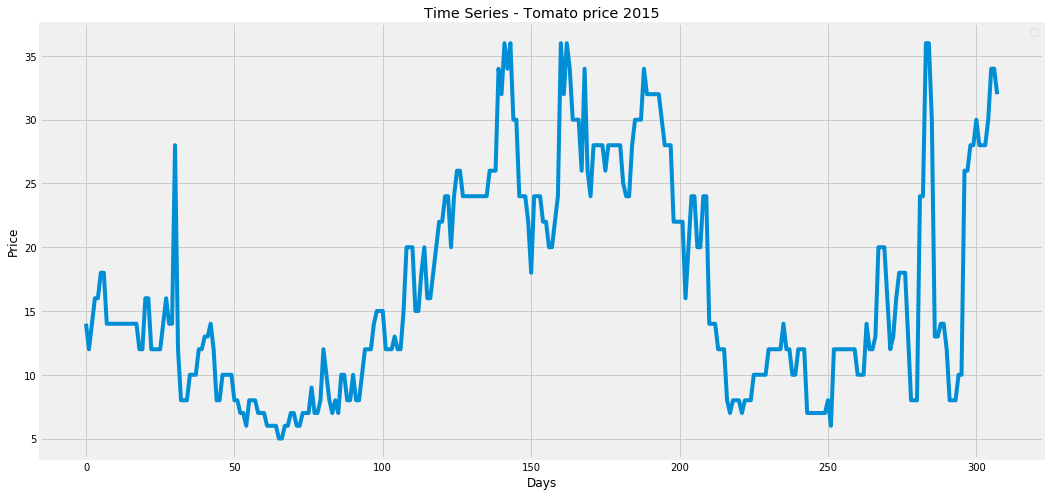

In [8]:
plt.figure(figsize = (16,8))
plt.plot(df)
plt.title("Time Series - Tomato price 2015")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend(loc = 'best')

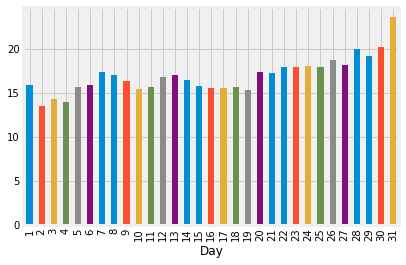

In [9]:
dataframe['Day'] = dataframe['Date'].dt.day
dataframe['Month'] = dataframe['Date'].dt.month

dataframe.groupby('Day')['Tomotto ottu / Thakkali Ottu'].mean().plot.bar()

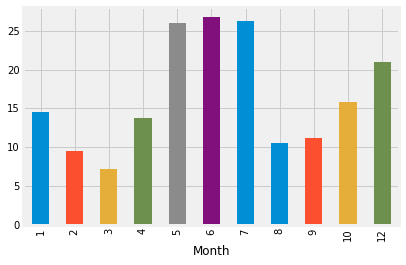

In [10]:
dataframe.groupby('Month')['Tomotto ottu / Thakkali Ottu'].mean().plot.bar()

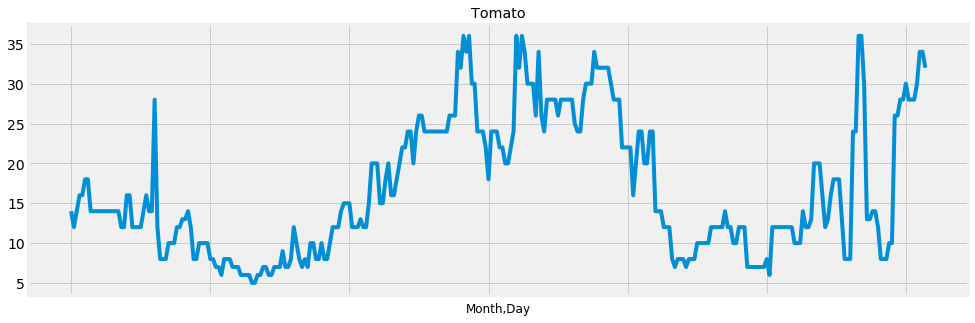

In [11]:
temp = dataframe.groupby(['Month','Day'])['Tomotto ottu / Thakkali Ottu'].mean()
temp.plot(figsize =(15,5), title = "Tomato", fontsize = 14)

We can split our time series into two (or more) partitions and compare the mean and variance of each group.
If they differ and the difference is statistically significant, the time series is likely non-stationary.

In [12]:
#Summary Statistics
X = TS.iloc[:,0].values
X1, X2 = X[0:104], X[104:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=10.673077, mean2=19.926471
variance1=13.720044, variance2=71.911260


If the calculated t-statistic is greater than the critical t-value, the test concludes that there is a statistically significant difference between the two populations.
Therefore,here we'll accept the null hypothesis that there is statistically significant difference between the two populations.


In [13]:
#T-test
from scipy import stats

N = 104
a = X1
b = X2

## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation
#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

#std deviation
s = np.sqrt((var_a + var_b)/2)

# Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)

print("t = " + str(t))
print("p = " + str(2*p))

# Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

t = -10.168779868407164
p = 2.0
t = -10.588845708843696
p = 1.5722253702420776e-22


 ** Perform Dickey-Fuller test:** is used to check the stationarity
  H0:If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
  H1:The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
  p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
  p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [14]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=8,center=False).mean()
    rolstd = timeseries.rolling(window=8,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print ('Results of Dickey-Fuller Test:')
    #adfuller() function accepts only 1d array of time series so first convert it using:
    dk = timeseries.iloc[:,0].values
    dftest = adfuller(dk, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

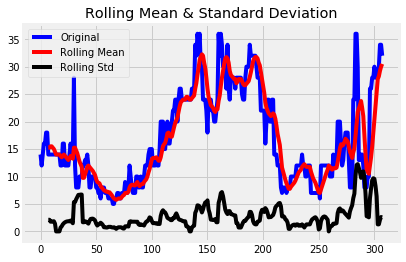

Results of Dickey-Fuller Test:
Test Statistic                  -1.412025
p-value                          0.576498
#Lags Used                      10.000000
Number of Observations Used    297.000000
Critical Value (1%)             -3.452561
Critical Value (5%)             -2.871321
Critical Value (10%)            -2.571982
dtype: float64


In [15]:
test_stationarity(TS)

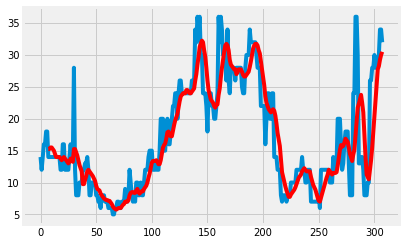

In [16]:
#Moving average
moving_avg = TS.rolling(window=8,center=False).mean()
plt.plot(TS)
plt.plot(moving_avg, color='red')

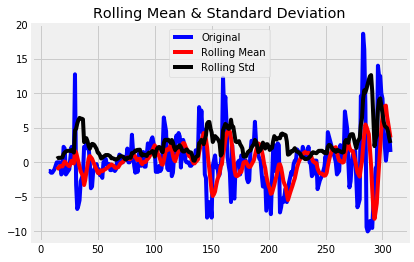

Results of Dickey-Fuller Test:
Test Statistic                  -5.639010
p-value                          0.000001
#Lags Used                      10.000000
Number of Observations Used    290.000000
Critical Value (1%)             -3.453102
Critical Value (5%)             -2.871559
Critical Value (10%)            -2.572108
dtype: float64


In [17]:
#Note that since we are taking average of last 8 values, rolling mean is not defined for first 7 values
ts_moving_avg_diff = TS - moving_avg
ts_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_moving_avg_diff)

*** Expotential weighted moving average***

Note that here the parameter ‘halflife’ is used to define the amount of exponential decay. This is just an assumption here and would depend largely on the business domain.

**Span** corresponds to what is commonly called an “N-day EW moving average”.Center of mass has a more physical interpretation and can be thought of in terms of span: \(c = (s - 1) / 2\).

**Half-life** is the period of time for the exponential weight to reduce to one half.
**Alpha** specifies the smoothing factor directly.

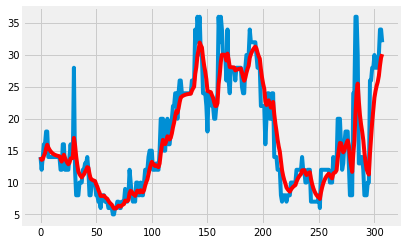

In [18]:
#Expotential weigghted moving average
expwighted_avg = TS.ewm(span=8,adjust=False).mean()
plt.plot(TS)
plt.plot(expwighted_avg, color='red')

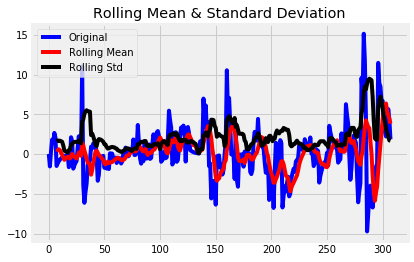

Results of Dickey-Fuller Test:
Test Statistic                -8.035229e+00
p-value                        1.910650e-12
#Lags Used                     2.000000e+00
Number of Observations Used    3.050000e+02
Critical Value (1%)           -3.451974e+00
Critical Value (5%)           -2.871063e+00
Critical Value (10%)          -2.571844e+00
dtype: float64


In [19]:
ts_ewma_diff = TS - expwighted_avg
test_stationarity(ts_ewma_diff)

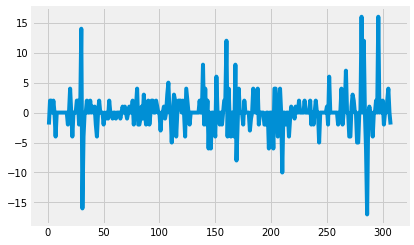

In [20]:
#Differencing
#we take the difference of the observation at a particular instant with that at the previous instant
ts_diff = TS - TS.shift()
plt.plot(ts_diff)

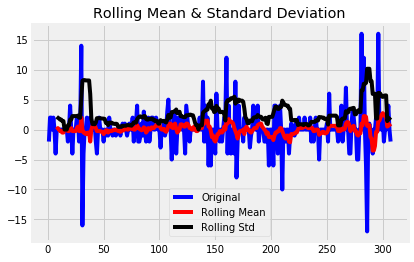

Results of Dickey-Fuller Test:
Test Statistic                -7.495778e+00
p-value                        4.383721e-11
#Lags Used                     9.000000e+00
Number of Observations Used    2.970000e+02
Critical Value (1%)           -3.452561e+00
Critical Value (5%)           -2.871321e+00
Critical Value (10%)          -2.571982e+00
dtype: float64


In [21]:
ts_diff.dropna(inplace=True)
test_stationarity(ts_diff)

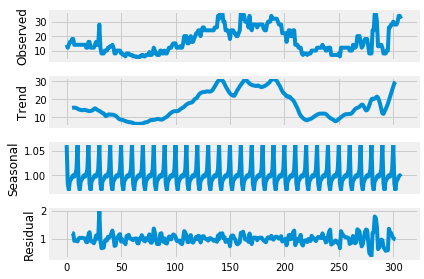

In [22]:
#Multiplicative Decomposition

from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(TS['Tomotto ottu / Thakkali Ottu'], model='multiplicative', freq=10)
trend = result.trend
seasonal = result.seasonal
residual = result.resid
result.plot()
pyplot.show()

In [23]:
ts_decompose = residual.to_frame()
ts_decompose = ts_decompose.dropna()

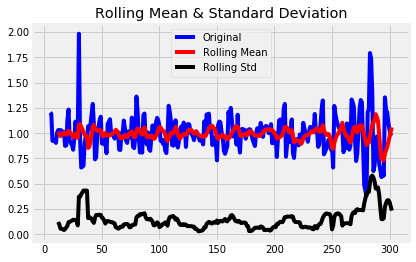

Results of Dickey-Fuller Test:
Test Statistic                -8.335388e+00
p-value                        3.283010e-13
#Lags Used                     1.100000e+01
Number of Observations Used    2.860000e+02
Critical Value (1%)           -3.453423e+00
Critical Value (5%)           -2.871699e+00
Critical Value (10%)          -2.572183e+00
dtype: float64


In [24]:
test_stationarity(ts_decompose)

**AR: Autoregression.** A model that uses the dependent relationship between an observation and some number of lagged observations.
I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

**MA:** Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

**ARIMA(p,d,q):**
p: The number of lag observations included in the model, also called the lag order.
d: The number of times that the raw observations are differenced, also called the degree of differencing.
q: The size of the moving average window, also called the order of moving average.

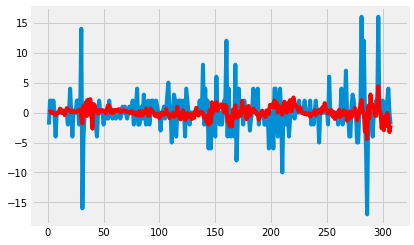

In [25]:
#ARIMA
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
model = ARIMA(TS, order=(10, 1, 1))  
results_AR = model.fit(disp=-2)
plt.plot(ts_diff)
plt.plot(results_AR.fittedvalues, color='red')

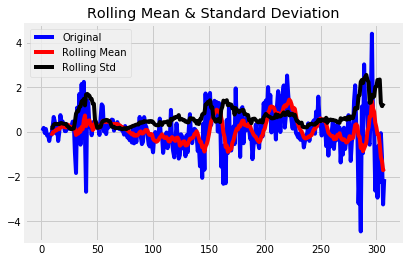

Results of Dickey-Fuller Test:
Test Statistic                  -3.074213
p-value                          0.028521
#Lags Used                      14.000000
Number of Observations Used    292.000000
Critical Value (1%)             -3.452945
Critical Value (5%)             -2.871490
Critical Value (10%)            -2.572071
dtype: float64


In [26]:
results_AR = results_AR.fittedvalues.to_frame(name='Tomotto ottu / Thakkali Ottu')
test_stationarity(results_AR)

predicted=18.448067, expected=20.000000
predicted=20.329295, expected=24.000000
predicted=24.115894, expected=24.000000
predicted=23.704307, expected=20.000000
predicted=21.775356, expected=20.000000
predicted=20.554058, expected=24.000000
predicted=23.841769, expected=24.000000
predicted=22.585446, expected=14.000000
predicted=16.211677, expected=14.000000
predicted=16.379193, expected=14.000000
predicted=14.886829, expected=12.000000
predicted=12.199159, expected=12.000000
predicted=12.959183, expected=12.000000
predicted=13.059687, expected=8.000000
predicted=10.838178, expected=7.000000
predicted=7.913385, expected=8.000000
predicted=8.717883, expected=8.000000
predicted=8.474136, expected=8.000000
predicted=8.302741, expected=7.000000
predicted=7.496860, expected=8.000000
predicted=8.627259, expected=8.000000
predicted=7.930333, expected=8.000000
predicted=7.906060, expected=10.000000
predicted=9.771630, expected=10.000000
predicted=9.519243, expected=10.000000
predicted=10.001854

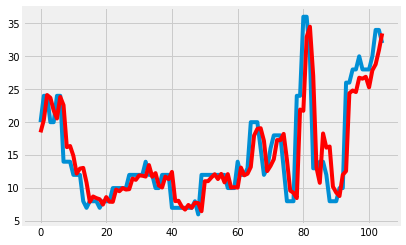

In [27]:
X = TS.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(10,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [28]:
# normalize the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
TS_log = scaler.fit_transform(TS)


In [29]:
# split into train and test sets
train_size = int(len(TS) * 0.67)
test_size = len(TS) - train_size
train, test = TS.iloc[0:train_size,:], TS.iloc[train_size:len(TS),:]
print(len(train), len(test))

206 102


In [30]:
import numpy
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataset = TS
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=1, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype float32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Epoch 1/1
 - 1s - loss: 0.1379
Train Score: 8.53 RMSE
Test Score: 6.71 RMSE


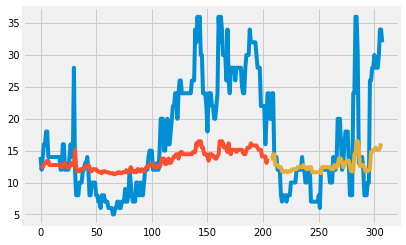

In [31]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()